In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
train = pd.read_csv('Training Data.csv')
test = pd.read_csv('Test Data.csv')

In [3]:
train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [4]:
prof = train.profession.unique()
count = {}
for index, row in train.iterrows():
    job = train.loc[index, 'profession']
    if not job in count:
        count[job] = 0
    if train.loc[index, 'risk_flag'] == 1:
        count[job] += 1
count

KeyboardInterrupt: 

In [ ]:
prof = train.profession.value_counts()
prof = prof.to_dict()

In [ ]:
# count_norm = {}
# for c in count:
#     count_norm[c] = 0
#     count_norm[c] = count[c]/prof[c]
# count_norm

In [25]:
sc = pd.DataFrame()
sc['job'] = train.profession.unique()
sc['total'] = sc['job'].map(prof)
sc['flagged'] = sc['job'].map(count)
sc.head()

,job,total,flagged
0,Mechanical_engineer,5217,582
1,Software_Developer,5053,750
2,Technical_writer,5195,697
3,Civil_servant,4413,511
4,Librarian,4628,521


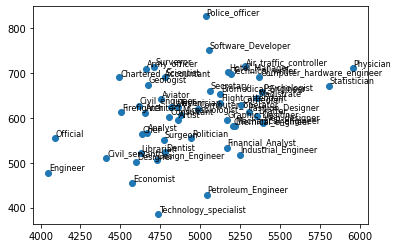

In [33]:
plt.scatter(sc['total'], sc['flagged'])
for index, row in sc.iterrows():
    plt.text(x = sc.loc[index, 'total']+5, y = sc.loc[index, 'flagged']+5, s = sc.loc[index, 'job'], fontdict=dict(size=8))
plt.show()

In [31]:
for p in test.profession.unique():
    if p not in train.profession.unique():
        print(p)

Flight attendant
Petroleum Engineer
Chartered Accountant
Web designer
Financial Analyst
Software Developer
Graphic Designer
Army officer
Civil servant
Chemical engineer
Air traffic controller
Civil engineer
Industrial Engineer
Hotel Manager
Mechanical engineer
Computer operator
Technical writer
Technology specialist
Biomedical Engineer
Design Engineer
Computer hardware engineer
Fashion Designer
Police officer


In [32]:
train.profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [34]:
for p in test.state.unique():
    if p not in train.state.unique():
        print(p)

West Bengal
Tamil Nadu
Andhra Pradesh
Madhya Pradesh
Uttar Pradesh
Uttar Pradesh[5]
Jammu and Kashmir
Himachal Pradesh


In [35]:
test.state.unique()

array(['West Bengal', 'Maharashtra', 'Jharkhand', 'Tamil Nadu', 'Haryana',
       'Gujarat', 'Andhra Pradesh', 'Bihar', 'Madhya Pradesh',
       'Chhattisgarh', 'Assam', 'Uttar Pradesh', 'Karnataka', 'Rajasthan',
       'Telangana', 'Uttar Pradesh[5]', 'Jammu and Kashmir', 'Odisha',
       'Uttarakhand', 'Punjab', 'Puducherry', 'Himachal Pradesh',
       'Chandigarh', 'Mizoram', 'Tripura', 'Delhi', 'Kerala', 'Sikkim',
       'Manipur'], dtype=object)

In [36]:
train.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [40]:
for p in test.city.unique():
    p = p.replace(' ', '_')
    if p not in train.city.unique():
        print(p)

In [6]:
train.current_house_years.value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: current_house_years, dtype: int64

In [4]:
train.city.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64

In [10]:
cities = train.city.unique()
city_prob = {}
for city in cities:
#     print(city)
    sub = train[train['city'] ==  city]
    if city not in city_prob:
        city_prob[city] = 0
    city_prob[city] = sub[sub.risk_flag == 1].shape[0] / sub[sub.risk_flag == 0].shape[0]
#     print(sub[sub.risk_flag == 1].shape[0] / sub[sub.risk_flag == 0].shape[0])

In [11]:
city_prob

{'Rewa': 0.1383737517831669,
 'Parbhani': 0.1395973154362416,
 'Alappuzha': 0.1505016722408027,
 'Bhubaneswar': 0.4841075794621027,
 'Tiruchirappalli[10]': 0.13783403656821377,
 'Jalgaon': 0.10723514211886305,
 'Tiruppur': 0.07751937984496124,
 'Jamnagar': 0.09390862944162437,
 'Kota[6]': 0.164021164021164,
 'Karimnagar': 0.09144542772861357,
 'Hajipur[31]': 0.14613778705636743,
 'Adoni': 0.12117647058823529,
 'Erode[17]': 0.11530398322851153,
 'Kollam': 0.15062111801242237,
 'Madurai': 0.13834586466165413,
 'Anantapuram[24]': 0.09110867178924259,
 'Kamarhati': 0.21473354231974923,
 'Bhusawal': 0.20477815699658702,
 'Sirsa': 0.12738853503184713,
 'Amaravati': 0.06870229007633588,
 'Secunderabad': 0.14392523364485982,
 'Ahmedabad': 0.25775193798449614,
 'Ajmer': 0.16106442577030813,
 'Ongole': 0.11962224554039874,
 'Miryalaguda': 0.17318435754189945,
 'Ambattur': 0.13675213675213677,
 'Indore': 0.23093681917211328,
 'Pondicherry': 0.09791921664626684,
 'Shimoga': 0.07510431154381085,
 '